In [309]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [31]:
migration = pd.read_csv('migration_merged_cleaned.csv')

## Explore dataset and do some extra pre-processing before starting analysis 

In [32]:
migration.head()

,country,sub-region,continent,2002–03,2003–04,2004–05,2005–06,2006–07,2007–08,2008–09,2009–10,2010–11,2011–12,2012–13,2013–14,2014–15,2015–16,2016–17
0,Afghanistan,Central Asia,Asia,982.0,1253.0,1557.0,2567.0,2285.0,1785.0,1578.0,1495.0,1860.0,1385.0,1770.0,4252.0,2817.0,2672.0,2944.0
1,Armenia,Central Asia,Asia,28.0,17.0,6.0,8.0,16.0,14.0,39.0,22.0,16.0,41.0,32.0,35.0,32.0,26.0,42.0
2,Azerbaijan,Central Asia,Asia,5.0,13.0,15.0,13.0,11.0,11.0,22.0,25.0,20.0,24.0,39.0,25.0,28.0,18.0,19.0
3,Georgia,Central Asia,Asia,11.0,5.0,8.0,5.0,13.0,10.0,20.0,29.0,14.0,23.0,26.0,29.0,26.0,18.0,16.0
4,Kazakhstan,Central Asia,Asia,29.0,48.0,40.0,50.0,46.0,67.0,110.0,83.0,79.0,109.0,114.0,99.0,101.0,117.0,119.0


In [73]:
migration.shape

(240, 18)

In [74]:
migration['continent'].value_counts()

Africa      59
Europe      53
Asia        52
Americas    52
Oceania     24
Name: continent, dtype: int64

In [34]:
migration['2008–09'].sum()

219547.0

In [284]:
numbers_per_year = [migration.sum(numeric_only=True)]
df = pd.DataFrame (numbers_per_year)
df = df.T # transpose
df

,0
2002–03,125870.0
2003–04,148431.0
2004–05,162801.0
2005–06,174782.0
2006–07,190864.0
2007–08,203238.0
2008–09,219547.0
2009–10,203647.0
2010–11,207855.0
2011–12,237371.0


In [285]:
df = df.reset_index()

In [286]:
df = df.rename(columns={'index': 'financial_year', 0: 'total_immigrants'})

In [287]:
df['financial_year']= df['financial_year'].str.replace("(–).*","-07-01")

In [288]:
df['year_only'] = df['financial_year'].str.split('-').str[0]

In [289]:
df

,financial_year,total_immigrants,year_only
0,2002-07-01,125870.0,2002
1,2003-07-01,148431.0,2003
2,2004-07-01,162801.0,2004
3,2005-07-01,174782.0,2005
4,2006-07-01,190864.0,2006
5,2007-07-01,203238.0,2007
6,2008-07-01,219547.0,2008
7,2009-07-01,203647.0,2009
8,2010-07-01,207855.0,2010
9,2011-07-01,237371.0,2011


In [290]:
df['financial_year'] = pd.to_datetime(df['financial_year'])

In [291]:
df['year_only'] = pd.DatetimeIndex(df['year_only']).year

In [292]:
df

,financial_year,total_immigrants,year_only
0,2002-07-01,125870.0,2002
1,2003-07-01,148431.0,2003
2,2004-07-01,162801.0,2004
3,2005-07-01,174782.0,2005
4,2006-07-01,190864.0,2006
5,2007-07-01,203238.0,2007
6,2008-07-01,219547.0,2008
7,2009-07-01,203647.0,2009
8,2010-07-01,207855.0,2010
9,2011-07-01,237371.0,2011


In [293]:
df.dtypes

financial_year      datetime64[ns]
total_immigrants           float64
year_only                    int64
dtype: object

## make plots representing changes in immigration over time

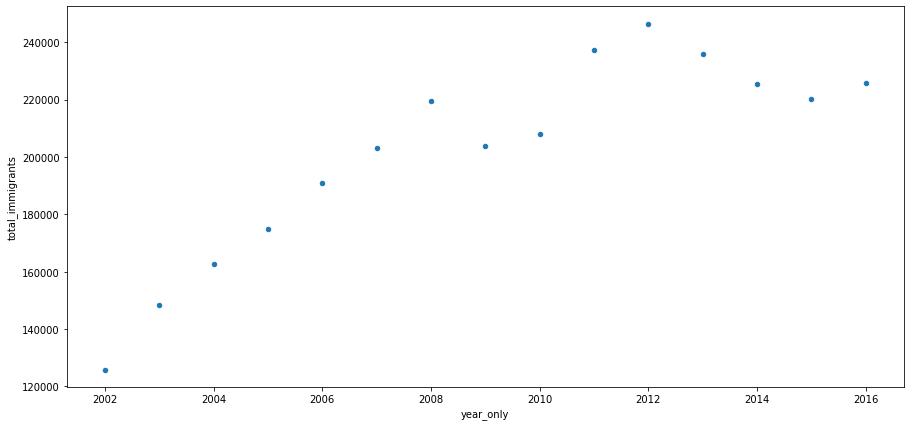

In [295]:
ax2 = df.plot.scatter(x='year_only',
                      y='total_immigrants', figsize=(15,7))


- overall upward trend, increasing number of immigrants over time
- doubled in decade from 2002-3 to 2012-13
- steep increase 2002-2009
- Drop in 2009-11
- Increase 2011-13
- Drop again 2013-16

In [296]:
df = (df
      .sort_values("financial_year")
      .assign(t=range(1, len(df)+1)))
df

,financial_year,total_immigrants,year_only,t
0,2002-07-01,125870.0,2002,1
1,2003-07-01,148431.0,2003,2
2,2004-07-01,162801.0,2004,3
3,2005-07-01,174782.0,2005,4
4,2006-07-01,190864.0,2006,5
5,2007-07-01,203238.0,2007,6
6,2008-07-01,219547.0,2008,7
7,2009-07-01,203647.0,2009,8
8,2010-07-01,207855.0,2010,9
9,2011-07-01,237371.0,2011,10


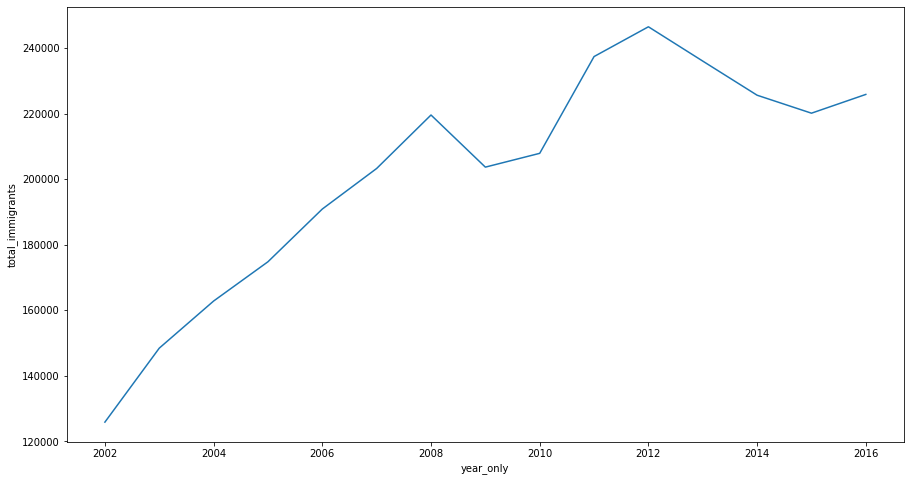

In [298]:
fig, ax = plt.subplots(figsize=(15,8))

sns.lineplot(data=df, 
             x="year_only", 
             y="total_immigrants", 
             ax=ax);

- general upward trend
- slight dip from 2008-9 to 2009-10
- sharp increase 2010-11 to 2011-12
- slight downard trend from mid 2012 onwards

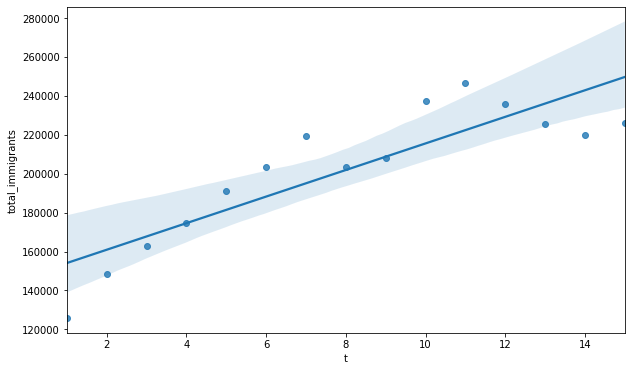

In [299]:
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(data=df, 
             x="t", 
             y="total_immigrants", 
             ax=ax);

## Export df to csv as total_immigrants_year

In [302]:
df.to_csv('total_immigrants_year.csv', sep=',', index=False, date_format='%Y-%m-%d')

## Explore and do some cleaning of subregional migration

In [121]:
migration['sub-region'].value_counts()

Sub-Saharan Africa                                52
South America, Central America & the Caribbean    48
Southern and Eastern Europe                       35
Oceania                                           24
North Africa & the Middle East                    24
North-West Europe                                 18
South East Asia                                   12
Central Asia                                       9
Southern Asia                                      7
North East Asia                                    7
Northern America                                   4
Name: sub-region, dtype: int64

In [123]:
subregion = migration_copy.groupby('sub-region').sum()

In [ ]:
subregion = subregion.T #transpose

In [153]:
subregion.dtypes

sub-region
index                                              object
Central Asia                                      float64
North Africa & the Middle East                    float64
North East Asia                                   float64
North-West Europe                                 float64
Northern America                                  float64
Oceania                                           float64
South America, Central America & the Caribbean    float64
South East Asia                                   float64
Southern Asia                                     float64
Southern and Eastern Europe                       float64
Sub-Saharan Africa                                float64
dtype: object

In [166]:
subregion = subregion.reset_index()

In [167]:
subregion

sub-region,index,Central Asia,North Africa & the Middle East,North East Asia,North-West Europe,Northern America,Oceania,"South America, Central America & the Caribbean",South East Asia,Southern Asia,Southern and Eastern Europe,Sub-Saharan Africa
0,2002–03,1099.0,11440.0,17084.0,22324.0,3670.0,16775.0,1955.0,21037.0,12910.0,6669.0,10907.0
1,2003–04,1410.0,12203.0,21171.0,29428.0,4012.0,19131.0,2166.0,22881.0,16662.0,5846.0,13521.0
2,2004–05,1697.0,13797.0,25342.0,30142.0,4128.0,22263.0,2392.0,23685.0,19692.0,5561.0,14102.0
3,2005–06,2767.0,12057.0,27540.0,35764.0,4410.0,23963.0,2677.0,24463.0,22506.0,5656.0,12979.0
4,2006–07,2460.0,10845.0,31584.0,36063.0,4201.0,28392.0,2585.0,26192.0,28476.0,5502.0,14564.0
5,2007–08,1980.0,9828.0,31172.0,37608.0,4332.0,33308.0,3046.0,28050.0,33002.0,5772.0,15140.0
6,2008–09,1883.0,12558.0,32609.0,39818.0,4619.0,32515.0,3362.0,29994.0,36024.0,6190.0,19975.0
7,2009–10,1770.0,9936.0,33166.0,33508.0,4802.0,24685.0,4086.0,30196.0,34761.0,6079.0,20658.0
8,2010–11,2095.0,11137.0,37147.0,28565.0,4471.0,34060.0,3479.0,30907.0,33828.0,5813.0,16353.0
9,2011–12,1697.0,11239.0,34705.0,36520.0,4963.0,42925.0,4121.0,34324.0,43190.0,6808.0,16879.0


In [168]:
#rename columns
subregion = subregion.rename(columns={'sub-region': 'index', 'index': 'financial_year'})

In [175]:
subregion.columns

Index(['financial_year', 'Central Asia', 'North Africa & the Middle East',
       'North East Asia', 'North-West Europe', 'Northern America', 'Oceania',
       'South America, Central America & the Caribbean', 'South East Asia',
       'Southern Asia', 'Southern and Eastern Europe', 'Sub-Saharan Africa'],
      dtype='object', name='sub-region')

In [176]:
subregion['year_only'] = subregion['financial_year'].str.split('–').str[0]

In [178]:
subregion['year_only'] = pd.DatetimeIndex(subregion['year_only']).year

In [180]:
subregion.dtypes

sub-region
financial_year                                     object
Central Asia                                      float64
North Africa & the Middle East                    float64
North East Asia                                   float64
North-West Europe                                 float64
Northern America                                  float64
Oceania                                           float64
South America, Central America & the Caribbean    float64
South East Asia                                   float64
Southern Asia                                     float64
Southern and Eastern Europe                       float64
Sub-Saharan Africa                                float64
year_only                                           int64
dtype: object

In [179]:
subregion

sub-region,financial_year,Central Asia,North Africa & the Middle East,North East Asia,North-West Europe,Northern America,Oceania,"South America, Central America & the Caribbean",South East Asia,Southern Asia,Southern and Eastern Europe,Sub-Saharan Africa,year_only
0,2002–03,1099.0,11440.0,17084.0,22324.0,3670.0,16775.0,1955.0,21037.0,12910.0,6669.0,10907.0,2002
1,2003–04,1410.0,12203.0,21171.0,29428.0,4012.0,19131.0,2166.0,22881.0,16662.0,5846.0,13521.0,2003
2,2004–05,1697.0,13797.0,25342.0,30142.0,4128.0,22263.0,2392.0,23685.0,19692.0,5561.0,14102.0,2004
3,2005–06,2767.0,12057.0,27540.0,35764.0,4410.0,23963.0,2677.0,24463.0,22506.0,5656.0,12979.0,2005
4,2006–07,2460.0,10845.0,31584.0,36063.0,4201.0,28392.0,2585.0,26192.0,28476.0,5502.0,14564.0,2006
5,2007–08,1980.0,9828.0,31172.0,37608.0,4332.0,33308.0,3046.0,28050.0,33002.0,5772.0,15140.0,2007
6,2008–09,1883.0,12558.0,32609.0,39818.0,4619.0,32515.0,3362.0,29994.0,36024.0,6190.0,19975.0,2008
7,2009–10,1770.0,9936.0,33166.0,33508.0,4802.0,24685.0,4086.0,30196.0,34761.0,6079.0,20658.0,2009
8,2010–11,2095.0,11137.0,37147.0,28565.0,4471.0,34060.0,3479.0,30907.0,33828.0,5813.0,16353.0,2010
9,2011–12,1697.0,11239.0,34705.0,36520.0,4963.0,42925.0,4121.0,34324.0,43190.0,6808.0,16879.0,2011


In [182]:
subregion = (subregion
      .sort_values("financial_year")
      .assign(t=range(1, len(subregion)+1)))
subregion

sub-region,financial_year,Central Asia,North Africa & the Middle East,North East Asia,North-West Europe,Northern America,Oceania,"South America, Central America & the Caribbean",South East Asia,Southern Asia,Southern and Eastern Europe,Sub-Saharan Africa,year_only,t
0,2002–03,1099.0,11440.0,17084.0,22324.0,3670.0,16775.0,1955.0,21037.0,12910.0,6669.0,10907.0,2002,1
1,2003–04,1410.0,12203.0,21171.0,29428.0,4012.0,19131.0,2166.0,22881.0,16662.0,5846.0,13521.0,2003,2
2,2004–05,1697.0,13797.0,25342.0,30142.0,4128.0,22263.0,2392.0,23685.0,19692.0,5561.0,14102.0,2004,3
3,2005–06,2767.0,12057.0,27540.0,35764.0,4410.0,23963.0,2677.0,24463.0,22506.0,5656.0,12979.0,2005,4
4,2006–07,2460.0,10845.0,31584.0,36063.0,4201.0,28392.0,2585.0,26192.0,28476.0,5502.0,14564.0,2006,5
5,2007–08,1980.0,9828.0,31172.0,37608.0,4332.0,33308.0,3046.0,28050.0,33002.0,5772.0,15140.0,2007,6
6,2008–09,1883.0,12558.0,32609.0,39818.0,4619.0,32515.0,3362.0,29994.0,36024.0,6190.0,19975.0,2008,7
7,2009–10,1770.0,9936.0,33166.0,33508.0,4802.0,24685.0,4086.0,30196.0,34761.0,6079.0,20658.0,2009,8
8,2010–11,2095.0,11137.0,37147.0,28565.0,4471.0,34060.0,3479.0,30907.0,33828.0,5813.0,16353.0,2010,9
9,2011–12,1697.0,11239.0,34705.0,36520.0,4963.0,42925.0,4121.0,34324.0,43190.0,6808.0,16879.0,2011,10


In [ ]:
numbers_by_subregion = [migration.sum(numeric_only=True)]
df = pd.DataFrame (numbers_per_year)
df = df.T # transpose
df

In [304]:
subregion["total_immigrants"] = df['total_immigrants']

In [310]:
subregion['financial_year']= subregion['financial_year'].str.replace("(–).*","-07-01")


In [312]:
subregion['year_only'] = subregion['financial_year'].str.split('-').str[0]

In [313]:
subregion

sub-region,financial_year,Central Asia,North Africa & the Middle East,North East Asia,North-West Europe,Northern America,Oceania,"South America, Central America & the Caribbean",South East Asia,Southern Asia,Southern and Eastern Europe,Sub-Saharan Africa,year_only,t,total_immigrants
0,2002-07-01,1099.0,11440.0,17084.0,22324.0,3670.0,16775.0,1955.0,21037.0,12910.0,6669.0,10907.0,2002,1,125870.0
1,2003-07-01,1410.0,12203.0,21171.0,29428.0,4012.0,19131.0,2166.0,22881.0,16662.0,5846.0,13521.0,2003,2,148431.0
2,2004-07-01,1697.0,13797.0,25342.0,30142.0,4128.0,22263.0,2392.0,23685.0,19692.0,5561.0,14102.0,2004,3,162801.0
3,2005-07-01,2767.0,12057.0,27540.0,35764.0,4410.0,23963.0,2677.0,24463.0,22506.0,5656.0,12979.0,2005,4,174782.0
4,2006-07-01,2460.0,10845.0,31584.0,36063.0,4201.0,28392.0,2585.0,26192.0,28476.0,5502.0,14564.0,2006,5,190864.0
5,2007-07-01,1980.0,9828.0,31172.0,37608.0,4332.0,33308.0,3046.0,28050.0,33002.0,5772.0,15140.0,2007,6,203238.0
6,2008-07-01,1883.0,12558.0,32609.0,39818.0,4619.0,32515.0,3362.0,29994.0,36024.0,6190.0,19975.0,2008,7,219547.0
7,2009-07-01,1770.0,9936.0,33166.0,33508.0,4802.0,24685.0,4086.0,30196.0,34761.0,6079.0,20658.0,2009,8,203647.0
8,2010-07-01,2095.0,11137.0,37147.0,28565.0,4471.0,34060.0,3479.0,30907.0,33828.0,5813.0,16353.0,2010,9,207855.0
9,2011-07-01,1697.0,11239.0,34705.0,36520.0,4963.0,42925.0,4121.0,34324.0,43190.0,6808.0,16879.0,2011,10,237371.0


## Export subregion as csv

In [314]:
subregion.to_csv('immigrants_subregion_year.csv', sep=',', index=False, date_format='%Y-%m-%d')